## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Analysis For Visulalization #1
**Visualization #1** = *Movie Type/Genre & Domestic Gross*

In [3]:
file_name = 'bom.movie_gross.csv.gz'
df_typeandgross = pd.read_csv(f'zippedData/{file_name}')
df_typeandgross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
df_typeandgross.shape

(3387, 5)

In [5]:
df_typeandgross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
df_typeandgross = df_typeandgross.drop('studio', axis=1)
df_typeandgross

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [7]:
df_typeandgross.isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
df_typeandgross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [9]:
df_typeandgross['domestic_gross'].value_counts()

1100000.0      32
1000000.0      30
1300000.0      30
1200000.0      25
1400000.0      23
               ..
68800.0         1
87000000.0      1
739000.0        1
336000000.0     1
727000.0        1
Name: domestic_gross, Length: 1797, dtype: int64

In [11]:
df_typeandgross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [12]:
top10_df = df_typeandgross.sort_values('domestic_gross',ascending=False).iloc[:10]
top10_df
# top15_df.iloc[:, 3]
# top15_df.iloc[:, 0:2] 

,title,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,936700000.0,"1,131.6",2015
3080,Black Panther,700100000.0,646900000,2018
3079,Avengers: Infinity War,678800000.0,"1,369.5",2018
1873,Jurassic World,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,620200000.0,712400000,2017
3082,Incredibles 2,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),504000000.0,759500000,2017
2324,Finding Dory,486300000.0,542300000,2016


# Visualization #1: Movie Type/Genre & Domestic Gross

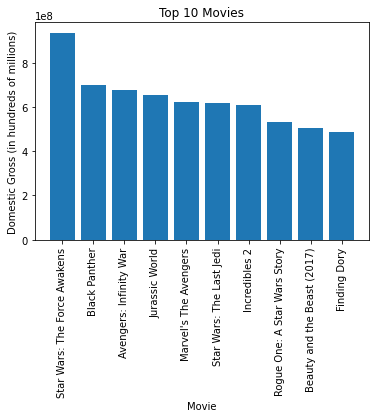

In [13]:
fig, ax = plt.subplots()

ax.bar(x=top10_df['title'], height=top10_df['domestic_gross'])

ax.tick_params(axis="x", labelrotation=90)
ax.set_title('Top 10 Movies')
ax.set_ylabel('Domestic Gross (in hundreds of millions)')
ax.set_xlabel('Movie');

# Conclusion for Visualization #1
*Box Office Mojo is an database that collects information on domestic & international movies & tv shows. After looking through the data collected from this source, 3887 movies had details on studio type, domestic gross, international gross, and year.*

*From analyzing this data, I found ~40% of the foreign gross was missing so I decided to not include this variable and the 'studio' column was dropped.* 

*Ultimately I created a report of the top 10 movies from the years of 2012 to 2018. The #1 highest grossing movie was a sci-fy movie, Star Wars: The Force Awakens. Aside from the #1 movie, the other 9 movies were fiction movies including 1 modern remade sci-fy , 3 cartoon animations, 3 super hero movies (from Marvel Comics), and 2 other movies in the Star Wars series.*

**My recommedation would be to focus on fiction movies such as: a sequel to a successful movie series, a modern remade sci-fy movie, a super hero movies especially from Marvel, and a cartoon animation.**   

# Data Analysis For Visulalization #2
**Visualization #2** = *Movie budget & gross*

In [14]:
file_name_dos = 'tn.movie_budgets.csv.gz'
df_budgetandg = pd.read_csv(f'zippedData/{file_name_dos}')

In [15]:
df_budgetandg.shape

(5782, 6)

In [16]:
df_budgetandg.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [17]:
df_budgetandg.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [18]:
df_budgetandg['worldwide_2gross'] = df_budgetandg['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(np.int64)

df_budgetandg['production_2budget'] = df_budgetandg['production_budget'].str.replace(',', '').str.replace('$', '').astype(np.int64)

df_budgetandg['domestic_2gross'] = df_budgetandg['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(np.int64)
# df_budgetandg

In [19]:
df_budgetandg.dtypes

id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
worldwide_2gross       int64
production_2budget     int64
domestic_2gross        int64
dtype: object

In [20]:
df_budgetandg.sort_values(['production_2budget', 'worldwide_2gross'], ascending=False).iloc[:20]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_2gross,production_2budget,domestic_2gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2776345279,425000000,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",1045663875,410600000,241063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",149762350,350000000,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",1403013963,330600000,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",1316721747,317000000,620181382
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2053311220,306000000,936662225
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2048134200,300000000,678815482
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",963420425,300000000,309420425
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",879620923,300000000,200074175
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",655945209,300000000,229024295


In [21]:
df_budgetandg['production_2budget']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_2budget, Length: 5782, dtype: int64

# Visualization #2: Movie Budget Vs. Gross

Text(0, 0.5, 'Worldwide Gross')

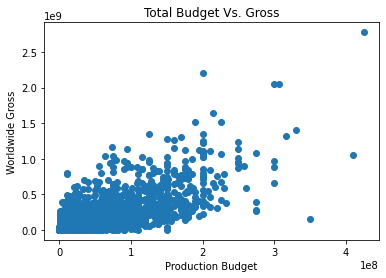

In [22]:
fig, ax = plt.subplots()
ax.scatter(x=df_budgetandg['production_2budget'] , y=df_budgetandg['worldwide_2gross'])
ax.set_title('Total Budget Vs. Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')

In [23]:
df_budgetandg.corr(method='pearson')

,id,worldwide_2gross,production_2budget,domestic_2gross
id,1.000000,-0.009422,-0.035278,0.008255
worldwide_2gross,-0.009422,1.000000,0.748306,0.938853
production_2budget,-0.035278,0.748306,1.000000,0.685682
domestic_2gross,0.008255,0.938853,0.685682,1.000000


# Conclusion for Visualization #2

*Box Office Mojo is an database that collects information on domestic & international movies & tv shows. After looking through the data collected from this source, 3887 movies had details on studio type, domestic gross, international gross, and year.*

*From analyzing this data, I found ~40% of the foreign gross was missing so I decided to not include this variable and the 'studio' column was dropped.* 

*Ultimately I created a report of the top 10 movies from the years of 2012 to 2018. The #1 highest grossing movie was a sci-fy movie, Star Wars: The Force Awakens. Aside from the #1 movie, the other 9 movies were fiction movies including 1 modern remade sci-fy , 3 cartoon animations, 3 super hero movies (from Marvel Comics), and 2 other movies in the Star Wars series.*

**My recommedation would be to focus on fiction movies such as: a sequel to a successful movie series, a modern remade sci-fy movie, a super hero movies especially from Marvel, and a cartoon animation.**   

# Data Analysis For Visulalization #3
**Visualization** #3** = *Movie Rating & Month*

In [32]:
file_name_tres = 'tmdb.movies.csv.gz'
df_ratingandrelease = pd.read_csv(f'zippedData/{file_name_tres}', index_col=0)
df_ratingandrelease.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [33]:
df_ratingandrelease[df_ratingandrelease['vote_average']>= 7]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
...,...,...,...,...,...,...,...,...,...
26374,[99],490002,en,Quiet Heroes,0.600,2018-01-21,Quiet Heroes,7.0,1
26375,"[99, 10402]",485918,en,The Godfathers of Hardcore,0.600,2018-12-12,The Godfathers of Hardcore,7.0,1
26376,"[18, 10749]",474560,en,Sebastian,0.600,2018-02-06,Sebastian,7.0,2
26377,[18],473470,ar,شهيد,0.600,2018-12-01,Martyr,7.0,3


In [34]:
df_ratingandrelease['vote_average'].describe()

count    26517.000000
mean         5.991281
std          1.852946
min          0.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: vote_average, dtype: float64

In [36]:
df_ratingandrelease[df_ratingandrelease['vote_average']>= 7].sort_values(['vote_average'], ascending=False).iloc[:20]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23106,"[18, 53]",486863,en,Magnum Opus,0.6,2017-11-09,Magnum Opus,10.0,1
19863,[18],426645,es,El pastor,0.6,2016-11-04,The Shepherd,10.0,2
19852,[10402],432403,en,Unenlightenment Supercut,0.6,2016-01-15,Unenlightenment Supercut,10.0,1
19853,[10402],432397,en,"January 13, 2016",0.6,2016-01-13,"January 13, 2016",10.0,1
19854,[10402],432391,en,Never Ever Say Never Ever,0.6,2016-01-08,Never Ever Say Never Ever,10.0,1
19855,[10402],432381,en,Anticipation,0.6,2016-02-22,Anticipation,10.0,1
19856,[10402],432380,en,Don't,0.6,2016-02-11,Don't,10.0,1
19857,[10402],432378,en,Suicide Sequence 3D,0.6,2016-03-09,Suicide Sequence 3D,10.0,1
19858,[10402],432377,en,Truth,0.6,2016-02-25,Truth,10.0,1
19859,[10402],432372,en,REMIXXX'd,0.6,2016-02-04,REMIXXX'd,10.0,1


In [41]:
df_ratingandrelease[df_ratingandrelease['vote_average']>= 7].describe()

,id,popularity,vote_average,vote_count
count,7843.000000,7843.000000,7843.000000,7843.000000
mean,334167.259850,2.802733,8.025896,296.017723
std,151741.838103,5.114936,1.032565,1434.170615
min,62.000000,0.600000,7.000000,1.000000
25%,224959.000000,0.600000,7.200000,1.000000
50%,360501.000000,0.840000,7.700000,2.000000
75%,453974.500000,2.103000,8.500000,14.000000
max,607777.000000,80.773000,10.000000,22186.000000


In [29]:
df_ratingandrelease.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

# Visualization #3: Movie Rating & Month

Text(0, 0.5, 'Vote Average')

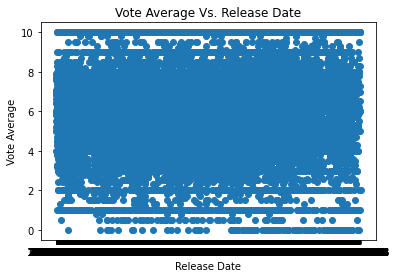

In [30]:
fig, ax = plt.subplots()
ax.scatter(x=df_ratingandrelease['release_date'] , y=df_ratingandrelease['vote_average'])
ax.set_title('Vote Average Vs. Release Date')
ax.set_xlabel('Release Date')
ax.set_ylabel('Vote Average')

# Conclusion for Visualization #3

*Box Office Mojo is an database that collects information on domestic & international movies & tv shows. After looking through the data collected from this source, 3887 movies had details on studio type, domestic gross, international gross, and year.*

*From analyzing this data, I found ~40% of the foreign gross was missing so I decided to not include this variable and the 'studio' column was dropped.* 

*Ultimately I created a report of the top 10 movies from the years of 2012 to 2018. The #1 highest grossing movie was a sci-fy movie, Star Wars: The Force Awakens. Aside from the #1 movie, the other 9 movies were fiction movies including 1 modern remade sci-fy , 3 cartoon animations, 3 super hero movies (from Marvel Comics), and 2 other movies in the Star Wars series.*

**My recommedation would be to focus on fiction movies such as: a sequel to a successful movie series, a modern remade sci-fy movie, a super hero movies especially from Marvel, and a cartoon animation.**   